## This notebook covers AP - Implementation, Hyper Params, Variants

1. Definition and Details
2. Intuitions
3. Run Time complexity 
4. Hyperparameters
5. Application in Python
6. Visualizations - using different sample datasets
7. Usecases, Advantages and Disadvantages


1. Resource - https://www.youtube.com/watch?v=DW4bi7XuRXg
2. Written Notes in Google Drive


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import seaborn as sns

In [58]:
# Generate data
X, y = make_blobs(n_samples = 200, centers = [(20,20), (4,4), (10,10),(10,5),(7.5,2.5)], n_features = 2, center_box=(0, 1), cluster_std = 1)

In [59]:
np.unique(y)

array([0, 1, 2, 3, 4])

<AxesSubplot:xlabel='xaxis', ylabel='yaxis'>

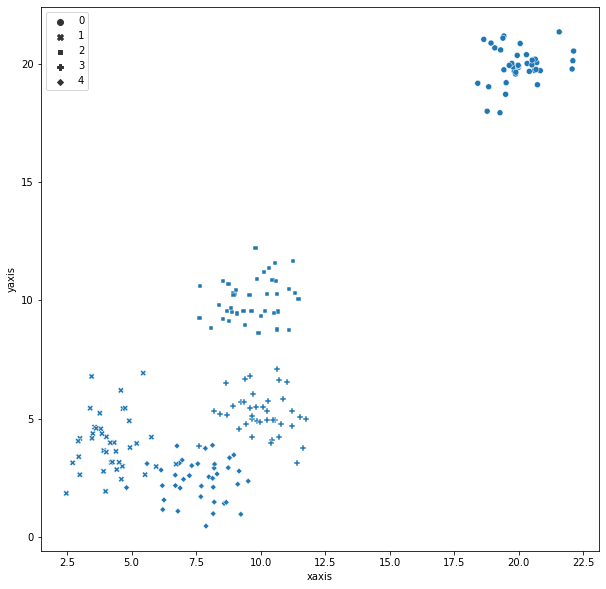

In [61]:
plt.rcParams["figure.figsize"] = [10, 10]
data_df = pd.DataFrame(X, columns = ['xaxis', 'yaxis'])
sns.scatterplot(data=data_df, x="xaxis", y="yaxis", style= y)

In [62]:
## Applying AP to this

ap = AffinityPropagation(random_state=5,verbose=True,max_iter=1000, damping = 0.5)
ap.fit(X)

Converged after 41 iterations.


AffinityPropagation(max_iter=1000, random_state=5, verbose=True)

In [63]:
ap.labels_  ## cluster labels are stored in this variable

array([2, 1, 3, 3, 0, 0, 4, 3, 4, 3, 0, 1, 2, 4, 0, 1, 4, 3, 2, 2, 0, 2,
       0, 2, 2, 3, 3, 0, 0, 0, 0, 0, 2, 2, 4, 4, 0, 3, 1, 4, 3, 2, 0, 0,
       2, 3, 4, 2, 3, 1, 4, 4, 4, 1, 2, 1, 3, 3, 1, 4, 3, 3, 1, 3, 4, 3,
       2, 1, 0, 4, 1, 2, 3, 0, 0, 4, 4, 2, 1, 3, 3, 1, 3, 4, 2, 3, 4, 3,
       0, 1, 0, 0, 1, 2, 2, 1, 3, 4, 3, 1, 0, 4, 2, 2, 1, 4, 4, 3, 3, 1,
       4, 4, 3, 0, 2, 1, 0, 1, 4, 0, 3, 0, 4, 0, 2, 1, 4, 1, 3, 3, 4, 2,
       3, 3, 1, 2, 1, 2, 3, 4, 0, 1, 1, 1, 2, 2, 3, 2, 0, 0, 2, 0, 3, 1,
       0, 0, 4, 1, 2, 4, 3, 1, 1, 1, 3, 2, 4, 4, 4, 0, 0, 1, 3, 3, 1, 0,
       4, 0, 0, 1, 2, 4, 2, 4, 1, 2, 0, 2, 0, 1, 2, 1, 4, 1, 2, 2, 0, 4,
       3, 4])

In [64]:
np.unique(ap.labels_)

array([0, 1, 2, 3, 4])

In [65]:
ap.cluster_centers_

array([[ 4.17653427,  3.97883304],
       [19.97914875, 19.9005528 ],
       [10.24985551,  5.31079984],
       [ 7.70456798,  2.1479719 ],
       [ 9.56303518, 10.22225928]])

<AxesSubplot:xlabel='xaxis', ylabel='yaxis'>

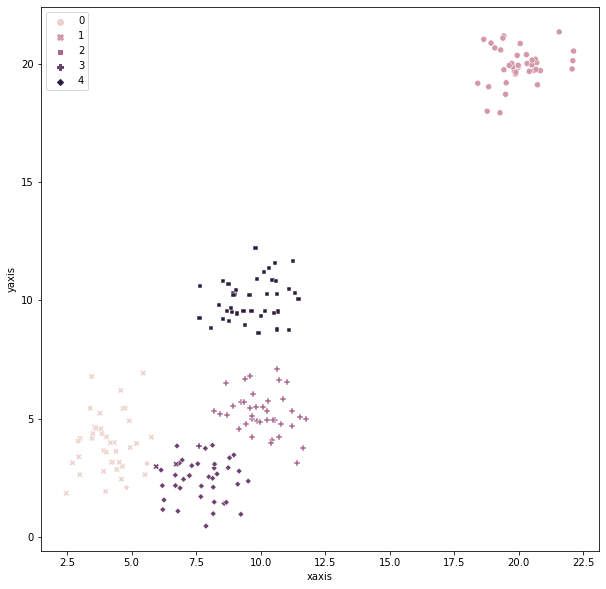

In [66]:
sns.scatterplot(data=data_df, x="xaxis", y="yaxis", hue= ap.labels_ , style=y)

# Hyperparameters

### class sklearn.cluster.AffinityPropagation(*, damping=0.5, max_iter=200, convergence_iter=15, copy=True, preference=None, affinity='euclidean', verbose=False, random_state=None)

## Let's check the performance on non spherical dataset

#### Very bad clustering will be done because we're using euclidean distance as a similarity metric

In [74]:
X, y = make_moons(n_samples = 1000, noise = 0.02)
np.shape(X), np.shape(y)

((1000, 2), (1000,))

<AxesSubplot:xlabel='xaxis', ylabel='yaxis'>

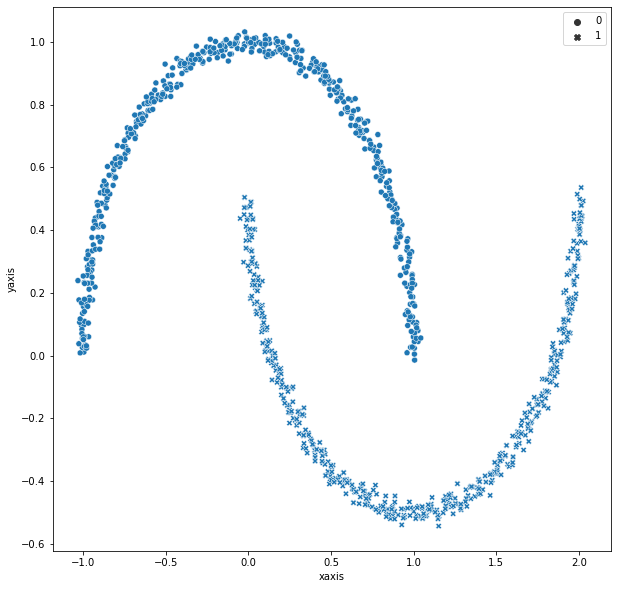

In [75]:
plt.rcParams["figure.figsize"] = [10, 10]
data_df = pd.DataFrame(X, columns = ['xaxis', 'yaxis'])
sns.scatterplot(data=data_df, x="xaxis", y="yaxis", style= y 
               )

In [76]:
## Applying AP to this

ap = AffinityPropagation(random_state=5,verbose=True,max_iter=1000, damping = 0.7)
ap.fit(X)

Converged after 73 iterations.


AffinityPropagation(damping=0.7, max_iter=1000, random_state=5, verbose=True)

In [77]:
np.unique(ap.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

<AxesSubplot:xlabel='xaxis', ylabel='yaxis'>

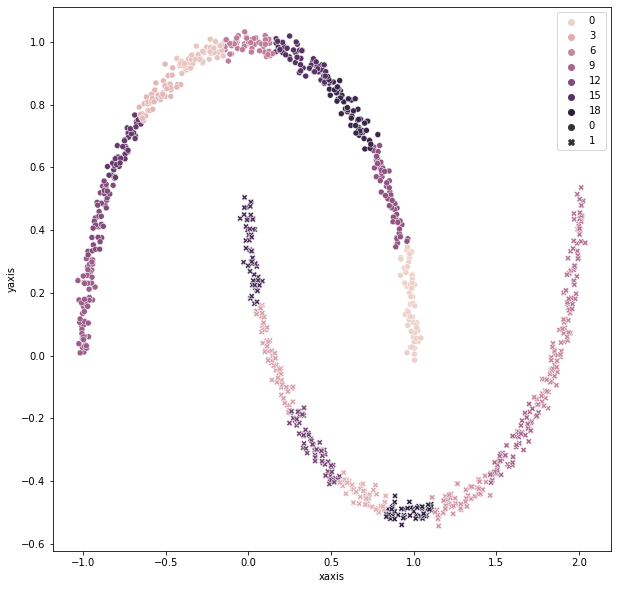

In [78]:
sns.scatterplot(data=data_df, x="xaxis", y="yaxis", hue= ap.labels_ , style=y)